<font size="12"> Visualizing Chipotle's Data<font>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# set this so the graphs open internally
%matplotlib inline

In [2]:
url= "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. Create a histogram of the top 5 items bought

In [4]:
top_5 = chipo.item_name.value_counts().head(5)
print(top_5)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64


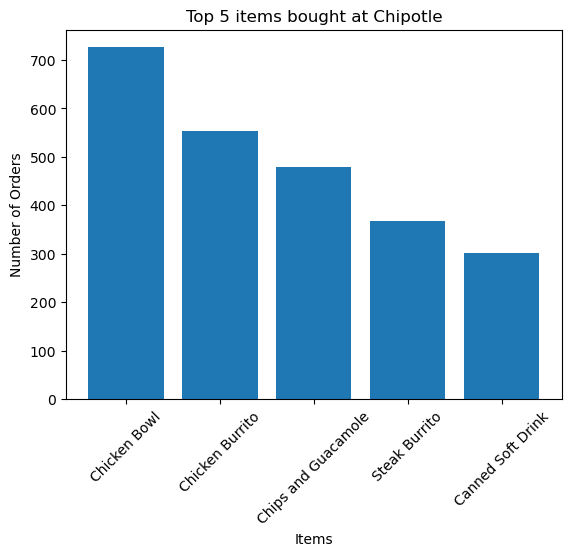

In [5]:
plt.bar(top_5.index, top_5.values)
plt.title('Top 5 items bought at Chipotle')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.show()

Step 6. Create a scatterplot with the number of items orderered per order price
Hint: Price should be in the X-axis and Items ordered in the Y-axis

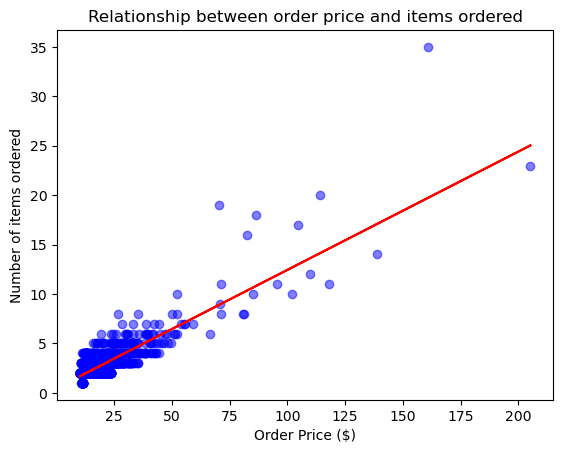

In [15]:
if chipo.item_price.dtype == 'object':
    chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

#item_stats = chipo.groupby('item_name').agg({'item_price': 'mean', 'quantity': 'sum'})
#chipo['subtotal'] = chipo['quantity'] * chipo['item_price']
orders = chipo.groupby('order_id').sum()  #obtengo el precio total por orden aplastandolo en una fila

import matplotlib.pyplot as plt
plt.scatter(x= orders.item_price, y=orders.quantity, color='blue', alpha=0.5)
m, b = np.polyfit(orders.item_price, orders.quantity, 1)
plt.plot(orders.item_price, m*orders.item_price + b, color='red')
plt.title('Relationship between order price and items ordered')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of items ordered')
plt.show()


<font size="5">BONUS: Create a question and a graph to answer your own question. <font>

<font size="4">What are the 10 products that have generated the most revenue (total money) for Chipotle, and what percentage do they represent of total sales?<font>

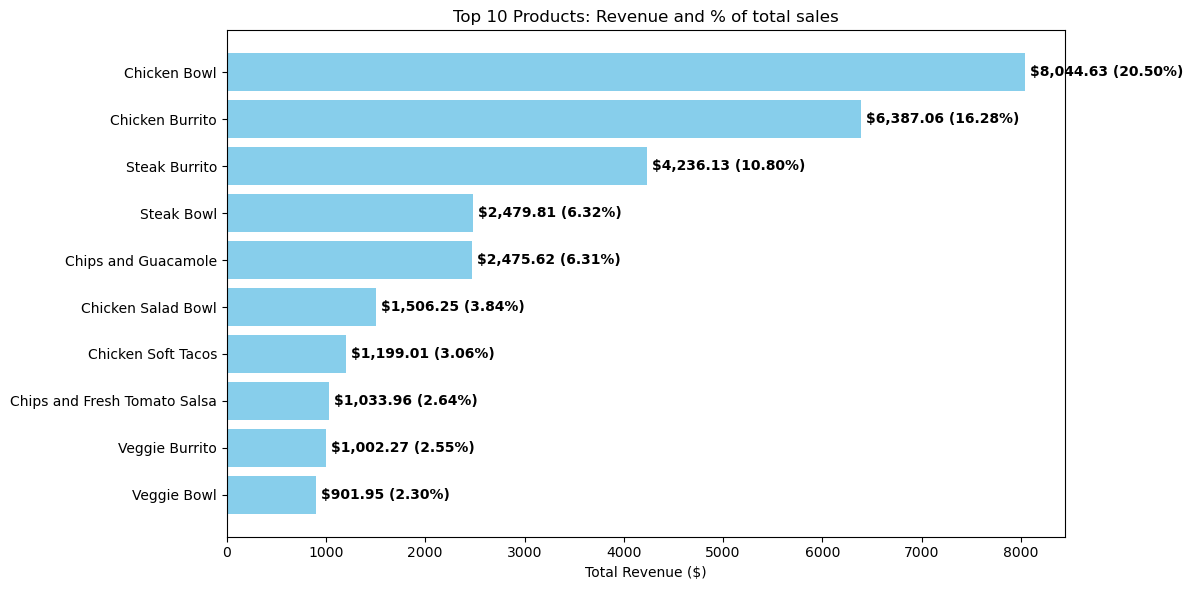

In [18]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
#top_revenue = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10)
#print(top_revenue)
total_revenue = chipo['revenue'].sum()
top_revenue = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10)
df_plot = top_revenue.to_frame(name='revenue')
#porcentajes
df_plot['percent'] = (df_plot['revenue'] / total_revenue) * 100


plt.figure(figsize=(12, 6))
df_plot = df_plot.sort_values(by='revenue', ascending=True)
bars = plt.barh(df_plot.index, df_plot['revenue'], color='skyblue')

for bar, percent in zip(bars, df_plot['percent']):
    width = bar.get_width()
    label_text = f'${width:,.2f} ({percent:.2f}%)'
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, 
             label_text, 
             va='center', fontsize=10, fontweight='bold')

plt.title('Top 10 Products: Revenue and % of total sales')
plt.xlabel('Total Revenue ($)')
plt.tight_layout() 
plt.show()